In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
import pickle

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:
(1) The Mean & Median (50% Percentile) values are appoximately same of age, bmi & children so No Skewness are there. But in charges column the mean median difference is high so this coulumn data is having right sided skewness.
(2) By using isnull method above, we have found that no NaN values are there in this dataset.
(3) We are getting the difference between 75% Percentile and Maximum value, so OUtliers are there, especially in the charges column.

As we have to predict the Insurance Costs, so the charges column is our Target (Label) column. And because of the charges colomn is the continueous value data, we are using Linear Regression for this prediction.

<AxesSubplot:>

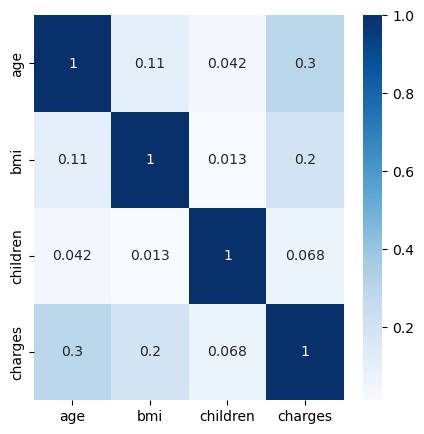

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

Observation:
(1) By the above Heatmap it is found that there is Negative relation between age & bmi, children & bmi and children & charges.


age            AxesSubplot(0.125,0.11;0.168478x0.77)
bmi         AxesSubplot(0.327174,0.11;0.168478x0.77)
children    AxesSubplot(0.529348,0.11;0.168478x0.77)
charges     AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

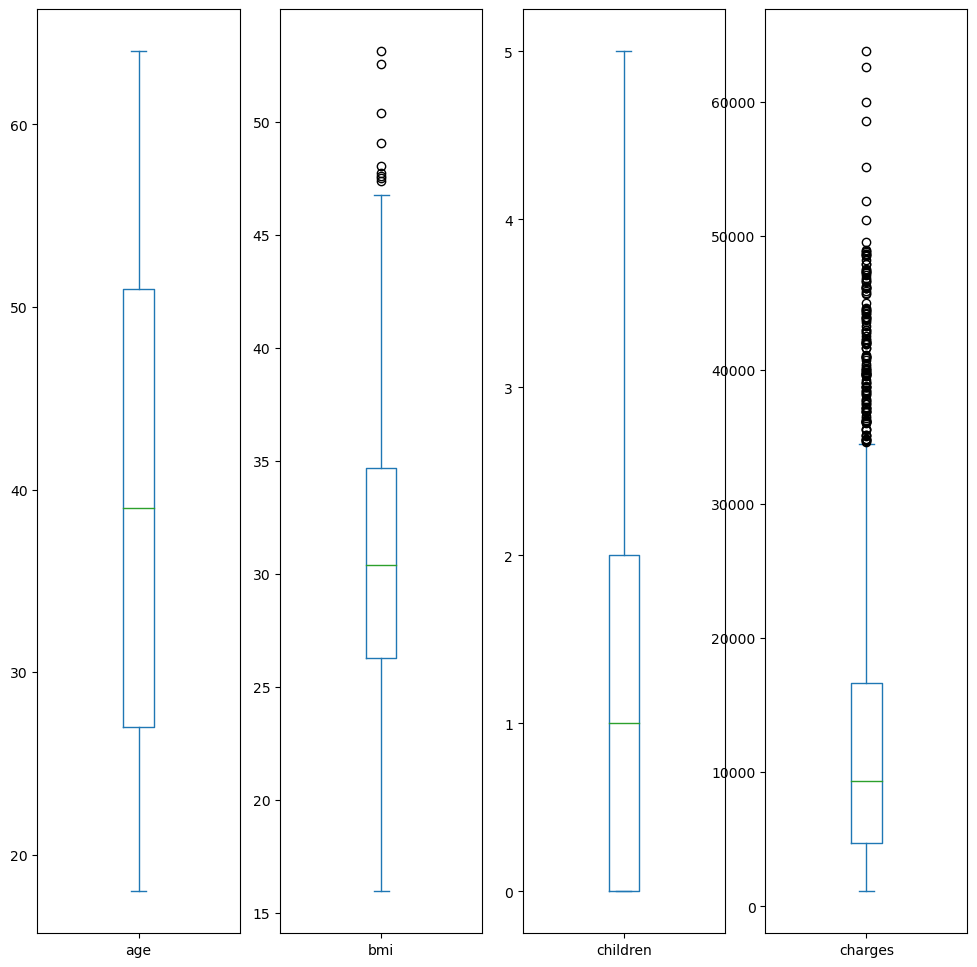

In [10]:
df.plot(kind='box',figsize=(12,12),layout=(1,4),subplots=True)

It is observed that bmi is having some outliers but charges column is having much amount of outliers data

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='sex', ylabel='charges'>

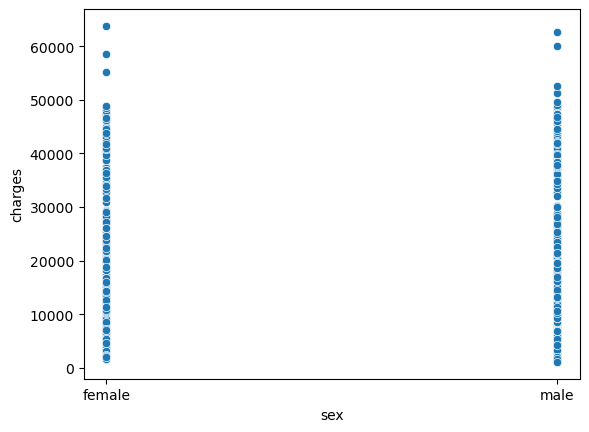

In [12]:
sns.scatterplot(df['sex'],df['charges'])

<AxesSubplot:xlabel='region', ylabel='charges'>

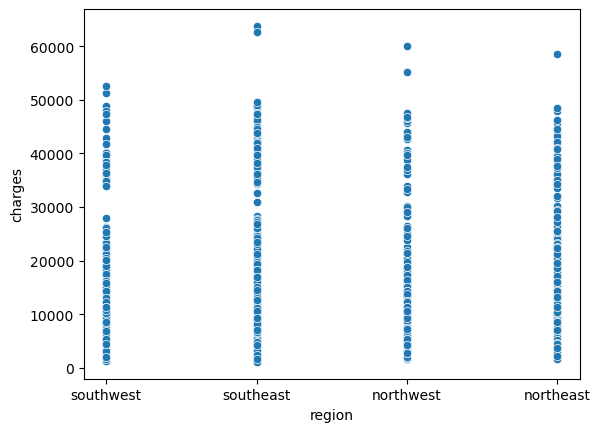

In [13]:
sns.scatterplot(df['region'],df['charges'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

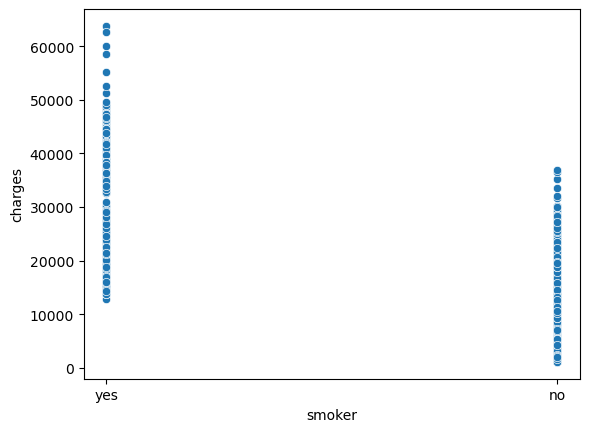

In [14]:
sns.scatterplot(df['smoker'],df['charges'])

Observation:
(1) Male medical charges are little greater than Female.
(2) Region wise medical costs are almost same, in southeast it is a little higher.
(3) Smoker persons medical charges are higher that the Non Smoker persons.

In [15]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [16]:
le=sklearn.preprocessing.LabelEncoder()

In [17]:
df['sex']=le.fit_transform(df['sex'])

In [18]:
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [19]:
df['smoker']=le.fit_transform(df['smoker'])

In [20]:
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [21]:
df['region']=le.fit_transform(df['region'])

In [22]:
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [23]:
absz=np.abs(zscore(df))

In [24]:
absz

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [25]:
cleaned_df=df[(absz<3).all(axis=1)]

In [26]:
cleaned_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
x=cleaned_df.iloc[:,0:-1]

In [28]:
x.shape

(1309, 6)

In [29]:
y=cleaned_df.iloc[:,-1]

In [30]:
y.shape

(1309,)

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=43)

In [32]:
xtrain.shape

(916, 6)

In [33]:
ytrain.shape

(916,)

In [34]:
xtest.shape

(393, 6)

In [35]:
ytest.shape

(393,)

In [36]:
lir=LinearRegression()

In [37]:
lir.fit(xtrain,ytrain)

LinearRegression()

In [38]:
pred1=lir.predict(xtest)

In [39]:
pred1

array([ 1.47382659e+04, -4.01527138e+02,  1.95119833e+03,  3.26806669e+04,
        2.66388517e+04,  5.62713357e+03,  7.14903018e+03,  1.37021421e+04,
        1.14535458e+04,  7.90302868e+01,  2.94214780e+04,  9.96353097e+03,
        1.07116972e+04,  4.23371352e+03,  3.85474026e+04,  2.52400477e+04,
        2.76946149e+04,  1.76240040e+04,  8.81906167e+03,  1.13431212e+04,
       -1.02636864e+03,  3.90754060e+04,  1.11626811e+04,  7.39304318e+03,
        3.57446543e+04,  8.07089669e+03,  1.35306735e+04,  5.94714113e+03,
        5.19679721e+03,  2.95513882e+04,  9.77891647e+03,  3.45558395e+04,
        1.11975035e+03,  1.87633672e+03,  1.01837941e+04,  1.20224163e+04,
        3.11841922e+04,  2.89791809e+03,  3.31896190e+04,  1.20183757e+04,
        9.01329693e+02,  1.10610362e+04,  3.66968852e+04,  1.28814022e+04,
        2.77427898e+04,  3.31536234e+03,  1.13985828e+04,  1.71616717e+04,
        3.04598457e+04,  2.16657179e+03,  1.53705732e+04,  1.16839518e+04,
        1.13000423e+04,  

In [40]:
r2_score(ytest,pred1)

0.7457114426106766

In [41]:
gbr=GradientBoostingRegressor()

In [42]:
gbr.fit(xtrain,ytrain)

GradientBoostingRegressor()

In [43]:
pred2=gbr.predict(xtest)

In [44]:
pred2

array([14762.7368168 ,  1725.74085151,  3257.30696166, 40934.26242852,
       34453.7958487 ,  5358.00361535,  6036.57345624, 12482.96090717,
       14395.34837354,  1570.81833477, 21233.45786508, 10827.88130299,
        8367.39560348,  4013.24224936, 45540.14143371, 18560.84203799,
       35020.89674387, 23855.19293808,  8006.20167658, 12038.8290054 ,
        1476.16430801, 48606.05123247, 14596.55926164,  4486.70505863,
       43868.8307133 ,  8253.06752374, 18464.6566994 ,  5024.06993841,
        2240.41272357, 18251.3546909 , 10395.25857091, 24862.06800624,
        2542.72842222,  1738.29767376,  8180.44272073, 12718.74114105,
       27179.97008729,  6880.2247018 , 41305.08224428, 15226.86636256,
        4569.49482651, 13709.21976197, 30448.21952905, 14544.24967399,
       37594.83413494,  5232.61806709, 11524.24022337, 13875.15697256,
       21597.85009509,  5209.56882771, 13449.30916576, 16087.37402997,
        9609.87864617,  6766.65925305, 15523.42421463,  5890.93943473,
      

In [45]:
r2_score(ytest,pred2)

0.8427911422408421

In [46]:
dtr=DecisionTreeRegressor()

In [47]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [48]:
pred3=dtr.predict(xtest)

In [49]:
pred3

array([13143.86485, 11884.04858,  1980.07   , 37742.5757 , 34303.1672 ,
        4454.40265,  5488.262  , 12105.32   , 28923.13692,  2257.47525,
       19107.7796 , 21232.18226,  7726.854  ,  3756.6216 , 46599.1084 ,
       18310.742  , 34806.4677 , 14235.072  ,  7337.748  , 10965.446  ,
        1621.8827 , 48517.56315, 13012.20865,  3021.80915, 37742.5757 ,
        6402.29135, 30166.61817,  2362.22905,  2138.0707 , 18765.87545,
        8534.6718 , 24667.419  ,  1253.936  ,  1135.9407 ,  8310.83915,
       11150.78   , 37829.7242 ,  3861.20965, 40720.55105, 14449.8544 ,
       25081.76784,  8240.5896 , 29141.3603 , 12644.589  , 36149.4835 ,
        4894.7533 , 10141.1362 , 12982.8747 , 19107.7796 , 12609.88702,
       11150.78   , 24513.09126,  8334.5896 ,  5375.038  , 12928.7911 ,
        5246.047  , 10602.385  ,  8347.1643 ,  4564.19145, 17361.7661 ,
       19719.6947 ,  5693.4305 ,  7152.6714 , 36124.5737 , 13224.693  ,
       27808.7251 ,  4149.736  , 36021.0112 , 37079.372  , 20420

In [50]:
r2_score(ytest,pred3)

0.7289060297863261

In [51]:
knn=KNeighborsRegressor()

In [52]:
knn.fit(xtrain,ytrain)

KNeighborsRegressor()

In [53]:
pred4=knn.predict(xtest)

In [54]:
pred4

array([19952.70864  ,  3682.877486 ,  4700.3718   , 10641.172382 ,
        8374.54386  ,  4446.04495  ,  6095.1057   , 15111.326802 ,
       15489.020394 , 10081.81997  ,  4917.72427  , 17369.425912 ,
        8457.12752  ,  4115.30659  , 20534.35178  ,  6327.1672338,
        9174.7268   , 24194.099562 ,  7284.50343  , 19420.291622 ,
        1395.87144  , 20071.81093  , 13550.11207  , 20157.475876 ,
        9736.434738 ,  6347.96098  , 23163.425484 ,  2102.50743  ,
        8968.21236  ,  8127.05272  ,  8966.10505  , 19110.504104 ,
        7742.35652  ,  1555.89928  ,  7043.97812  , 16021.150314 ,
        6608.41456  , 10544.602636 , 14525.23796  , 17327.194654 ,
        7050.679718 ,  8741.25794  , 22931.489982 , 12963.2531   ,
       15476.64546  ,  7934.73668  , 22298.69659  , 22529.946568 ,
        8855.49676  ,  9746.676298 , 24956.373464 , 18692.502812 ,
       11137.790876 ,  4870.18204  , 16493.83375  , 19659.21396  ,
       12751.287922 , 11901.7534   ,  4312.08207  ,  7916.2515

In [55]:
r2_score(ytest,pred4)

-0.05087465264047042

In [56]:
print(r2_score(ytest,pred1),r2_score(ytest,pred2),r2_score(ytest,pred3),r2_score(ytest,pred4))

0.7457114426106766 0.8427911422408421 0.7289060297863261 -0.05087465264047042


Observation: By the above r2_scores, we have observed the pred2 is giving 84% accurate predictions and which is coming from Gradient Boosting Regressor. So this is the best ML Model more accurate Insurance Cost prediction of this dataset.

In [57]:
pickle.dump(gbr, open('my_gbr_model', 'wb'))

In [58]:
gbr_model=pickle.load(open('my_gbr_model', 'rb'))

In [59]:
model_pred=gbr_model.predict(xtest)

In [60]:
model_pred

array([14762.7368168 ,  1725.74085151,  3257.30696166, 40934.26242852,
       34453.7958487 ,  5358.00361535,  6036.57345624, 12482.96090717,
       14395.34837354,  1570.81833477, 21233.45786508, 10827.88130299,
        8367.39560348,  4013.24224936, 45540.14143371, 18560.84203799,
       35020.89674387, 23855.19293808,  8006.20167658, 12038.8290054 ,
        1476.16430801, 48606.05123247, 14596.55926164,  4486.70505863,
       43868.8307133 ,  8253.06752374, 18464.6566994 ,  5024.06993841,
        2240.41272357, 18251.3546909 , 10395.25857091, 24862.06800624,
        2542.72842222,  1738.29767376,  8180.44272073, 12718.74114105,
       27179.97008729,  6880.2247018 , 41305.08224428, 15226.86636256,
        4569.49482651, 13709.21976197, 30448.21952905, 14544.24967399,
       37594.83413494,  5232.61806709, 11524.24022337, 13875.15697256,
       21597.85009509,  5209.56882771, 13449.30916576, 16087.37402997,
        9609.87864617,  6766.65925305, 15523.42421463,  5890.93943473,
      

In [61]:
r2_score(ytest,model_pred)

0.8427911422408421

We have saved our gbr ML model via pickle dump and used the same by pickle load and got the same output of medical cost prediction with 84% accuracy approximately.